#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## 1. Basic Data Exploration

In [ ]:
num_rows, num_cols = df.shape
data_types = df.dtypes
missing_values = df.isnull().sum()

# print the number of rows and columns in the dataset :
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")

# print the data types of each column :
print("\nData Types:")
print(data_types)

# print the missing values in each column
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Number of Rows: 148654
Number of Columns: 13

Data Types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing Values:
BasePay           609
OvertimePay         4
OtherPay            4
Benefits        36163
Notes          148654
Status         148654
dtype: int64


# 2. Descriptive Statistics

In [ ]:
# Calculate descriptive statistics
mean_salary = df['TotalPay'].mean()
mean_salary = round(mean_salary , 2 )
median_salary = df['TotalPay'].median()
median_salary = round(median_salary, 2)
mode_salary = df['TotalPay'].mode().iloc[0] # mode can be multiple, so selecting the first one
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df['TotalPay'].std()
std_dev_salary = round(std_dev_salary , 2)

# Print the results
print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Salary Range: {salary_range}")
print(f"Standard Deviation of Salary: {std_dev_salary}")

Mean Salary: 74768.32
Median Salary: 71426.61
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range: 568213.56
Standard Deviation of Salary: 50517.01


# 3. Cleaning Data

In [ ]:
# Drop 'Notes' and 'Status' columns
df_cleaned = df.drop(['Notes', 'Status'], axis=1)
# Drop the rows with small and randomly distributed missing values
df_cleaned = df_cleaned.dropna(subset=['OvertimePay', 'OtherPay'])
# Replace the missing base pay and benefits values with the mean base pay and mean benefits -> "Imputation"
mean_basepay = df_cleaned['BasePay'].mean()
mean_benefits = df_cleaned['Benefits'].mean()

# Use loc to fill missing values
df_cleaned.loc[:, 'BasePay'].fillna(mean_basepay, inplace=True)
df_cleaned.loc[:, 'Benefits'].fillna(mean_benefits, inplace=True)

# List of columns to check for negative values
columns_to_check = ['TotalPay', 'BasePay', 'Benefits', 'TotalPayBenefits', 'OvertimePay', 'OtherPay']

# Check for and delete rows with negative values in the specified columns
for column in columns_to_check:
    df_cleaned = df_cleaned[df_cleaned[column] >= 0]

# Drop rows with the value of zero since it appears as the mode of the dataset :
mode_count = df_cleaned[df_cleaned['TotalPay'] == 0].shape[0]
print("Number of rows where Mode Salary is 0:", mode_count) # 368 rows , a relatively small number so we can safely remove these rows

df_cleaned = df_cleaned[df_cleaned['TotalPay'] > 0]

Number of rows where Mode Salary is 0: 368


# calculating statistics after cleaning data

In [ ]:
# Calculate descriptive statistics
mean_salary = df_cleaned['TotalPay'].mean()
mean_salary = round(mean_salary , 2 )
median_salary = df_cleaned['TotalPay'].median()
median_salary = round(median_salary, 2)
mode_salary = df_cleaned['TotalPay'].mode().iloc[0]
min_salary = df_cleaned['TotalPay'].min()
max_salary = df_cleaned['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df_cleaned['TotalPay'].std()
std_dev_salary = round(std_dev_salary , 2)

# Print the results
print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Salary Range: {salary_range}")
print(f"Standard Deviation of Salary: {std_dev_salary}")

Mean Salary: 75541.64
Median Salary: 71982.36
Mode Salary: 18594.0
Minimum Salary: 5.56
Maximum Salary: 567595.43
Salary Range: 567589.87
Standard Deviation of Salary: 50226.26


# 4. Basic Data Visualization

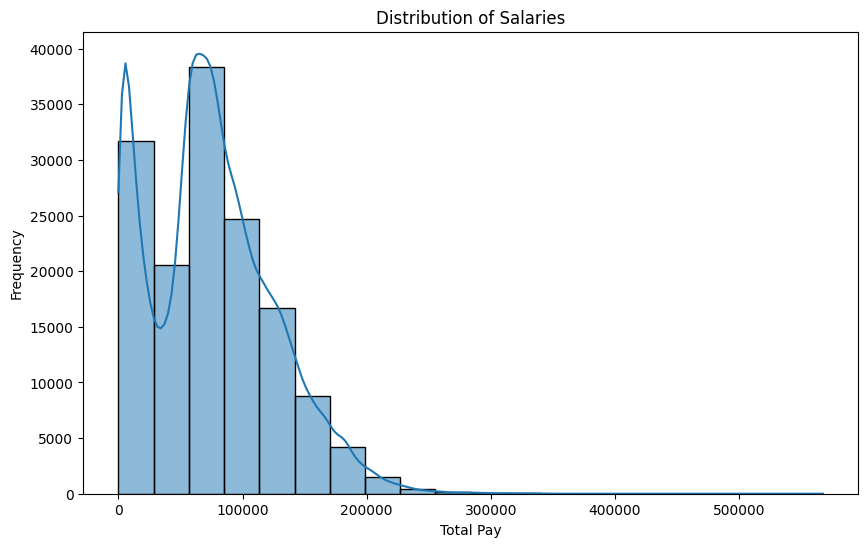

In [ ]:
# Visualization of salary distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['TotalPay'], bins=20, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

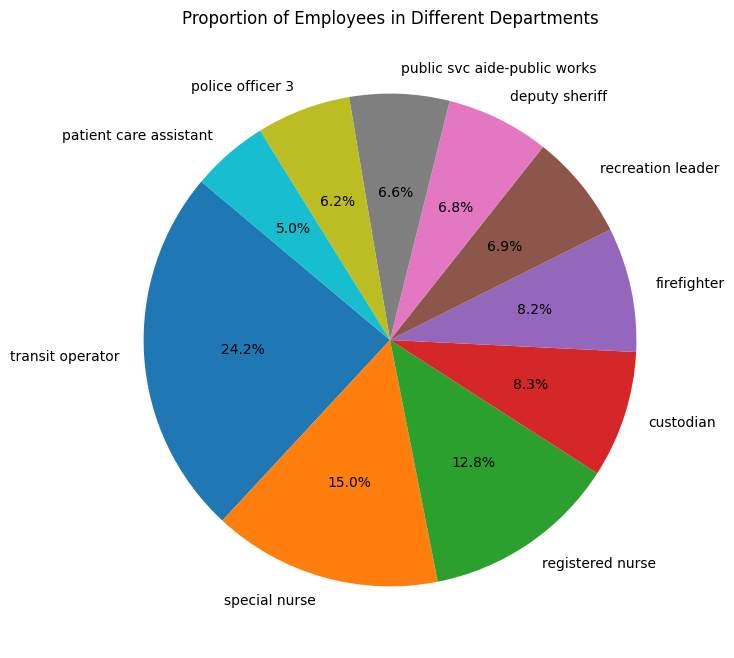

In [ ]:
# Convert 'JobTitle' to lowercase before counting
df_cleaned['JobTitle'] = df_cleaned['JobTitle'].str.lower()

# Visualization of proportion of employees in different departments using a pie chart
department_counts = df_cleaned['JobTitle'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.show()

# 5. Grouped Analysis

In [ ]:
# Group the data by 'JobTitle' and 'Year' and calculate average salaries for each group
average_salaries_by_job_year = df_cleaned.groupby(['JobTitle', 'Year'])['TotalPay'].mean()
average_salaries_by_job_year = round(average_salaries_by_job_year, 2)
# Display the result
print(average_salaries_by_job_year)

JobTitle                                        Year
ACCOUNT CLERK                                   2011    44035.66
ACCOUNTANT                                      2011    58999.48
ACCOUNTANT INTERN                               2011    29031.74
ACPO,JuvP, Juv Prob (SFERS)                     2014    62290.78
ACUPUNCTURIST                                   2011    67594.40
                                                          ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  2011    53632.87
Youth Comm Advisor                              2012    57544.73
                                                2013    35823.30
                                                2014    36465.91
ZOO CURATOR                                     2011    66686.56
Name: TotalPay, Length: 4116, dtype: float64


# 6. Simple Correlation Analysis

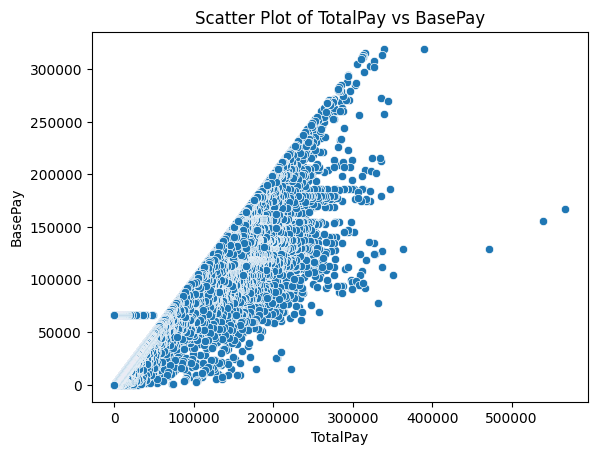

Correlation Coefficient between TotalPay and BasePay: 0.9520590186730443


In [ ]:
# analyzing correlation between Total Pay and Base Pay
sns.scatterplot(x='TotalPay', y='BasePay', data=df_cleaned)
plt.title('Scatter Plot of TotalPay vs BasePay')
plt.xlabel('TotalPay')
plt.ylabel('BasePay')
plt.show()

# Calculate the correlation coefficient
basepay_correlation_coefficient = df_cleaned['TotalPay'].corr(df_cleaned['BasePay'])
print(f"Correlation Coefficient between TotalPay and BasePay: {basepay_correlation_coefficient}")

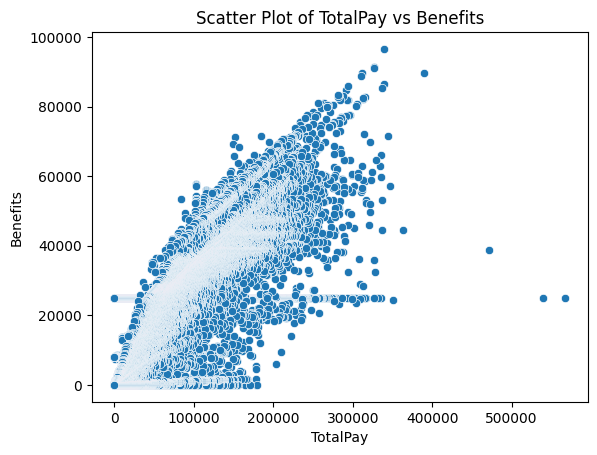

Correlation Coefficient between TotalPay and Benefits: 0.7817119044636348


In [ ]:
# analyzing the correlation between Total Pay and Benefits
sns.scatterplot(x='TotalPay', y='Benefits', data=df_cleaned)
plt.title('Scatter Plot of TotalPay vs Benefits')
plt.xlabel('TotalPay')
plt.ylabel('Benefits')
plt.show()

# Calculate the correlation coefficient
benefits_correlation_coefficient = df_cleaned['TotalPay'].corr(df_cleaned['Benefits'])
print(f"Correlation Coefficient between TotalPay and Benefits: {benefits_correlation_coefficient}")

# 7. Summary of Insights

## Employee Salaries Analysis Report

### Basic Data Exploration

- The dataset contains 148654 rows and 13 columns.
- Data types of each column include 'Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', and 'Status.'
- Missing values are handled through various methods, including dropping rows with small missing values, imputing mean values for 'BasePay' and 'Benefits,' and removing rows with negative or zero values in specific columns.

### Descriptive Statistics - after cleaning data :

- Mean Salary: 75541.64
- Median Salary: 71982.36
- Mode Salary: 18594.0
- Minimum Salary: 5.56
- Maximum Salary: 567595.43
- Salary Range: 567589.87
- Standard Deviation of Salary: 50226.26

### Data Cleaning

- Dropped 'Notes' and 'Status' columns.
- Removed rows with small and randomly distributed missing values.
- Imputed missing 'BasePay' and 'Benefits' values with mean values.
- Dropped rows with negative or zero values in specific columns.
- Visualized the distribution of salaries using a histogram.

### Basic Data Visualization

The salary distribution alongside the descriptive statistics show that the dataset has an average salary around $75,541.64, with a median salary close to this value. However, the standard deviation of $50,226.26 suggests a significant variability in salaries, indicating that there are employees with salaries much higher or lower than the average.

Upon analyzing the dataset, it was observed that the most prevalent job titles among employees are as follows:

1. Transit Operator: 24.2%

2. Special Nurse: 15.0%

3. Registered Nurse: 12.8%

### Grouped Analysis

- Explored average salaries by 'JobTitle' and 'Year.'
- Grouped data by 'JobTitle' and 'Year' to calculate average salaries.

### Correlation Analysis

- Identified a strong positive correlation between 'TotalPay' and 'BasePay' (Correlation Coefficient: 0.95) which indicates a strong positive linear relationship.
- Found a positive correlation between 'TotalPay' and 'Benefits' (Correlation Coefficient: 0.78).

### Insights

- The salary distribution is positively skewed, with most salaries clustered around the mean.
- Average salaries vary across different job titles and years, providing insights into salary trends.
- A strong correlation exists between 'TotalPay' and 'BasePay,' indicating that the base salary significantly contributes to the total compensation.
- A positive correlation between 'TotalPay' and 'Benefits' suggests a relationship between overall compensation and additional benefits.

### Recommendations

- Further analysis can be conducted to explore trends in salary distribution within specific departments.
- The impact of job titles and years on salary trends should be investigated for more targeted insights.
- Consideration for additional factors, such as employee experience and education, could enhance the understanding of compensation patterns.
